# Copyright and License

##### Copyright 2024 Google LLC.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Program

## Setup, Import, and Initialization

### Setup - Install the Python SDK and import packages

In [4]:
!pip install -q -U google-generativeai python-dotenv

You should consider upgrading via the 'D:\Programs\Python310\python.exe -m pip install --upgrade pip' command.


### Import the necessary packages.

In [1]:
import google.generativeai as genai
import PIL.Image
import IPython.display as display
import google.generativeai as genai

from IPython.display import Markdown

### Initialization

#### Run in Google Collab

In [ ]:
from google.colab import userdata

# Get the API key from here:
# https://aistudio.google.com/app/u/1/apikey?utm_source=colab.research.google.com&utm_medium=referral&utm_campaign=colab-integration&utm_content=owned-promo&pli=1

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

genai.configure(api_key=GOOGLE_API_KEY)

#### Run In Local

In [2]:
from dotenv import load_dotenv
import os

load_dotenv()  # Load variables from the .env file
GOOGLE_API_KEY = os.getenv("GOOGLE_API_KEY")  # Get the API key

genai.configure(api_key=GOOGLE_API_KEY)
print("API key configured successfully!")


API key configured successfully!


In [3]:
# Choose a Gemini model.
model = genai.GenerativeModel(model_name="gemini-1.5-pro-latest")

## Plate Number Detection

### Load File

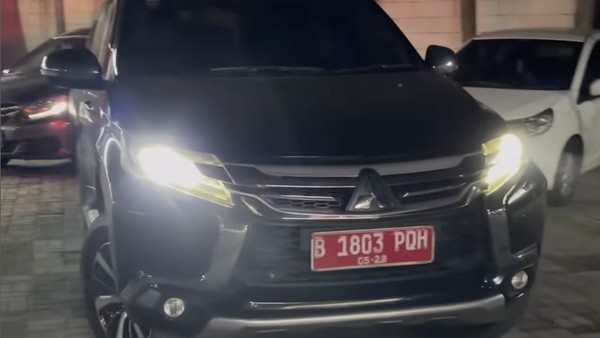

In [ ]:
taxi = PIL.Image.open('taxi.jpg')
bike_cirebon = PIL.Image.open('bike_cirebon.png')
car_jakarta = PIL.Image.open('car_jakarta.jpg')
government = PIL.Image.open('government.png')

""" 
CHANGE THIS VARIABLE TO CHANGE THE IMAGE 
"""
vehicle_to_analyze = government # image which plate number will be detected
display.display(vehicle_to_analyze) # shoe image

### Run Prompt to Detect Plate Number

In [ ]:
prompt = """
Recognize plate number input from picture with a return of JSON. 
The plate number is plate number in INDONESIA. Do not think about other country's format. 

The plate number contains 3 segment, prefix, number, and postfix.
For example if the plate number is BD 2541 WK:
- Prefix is BD
- Number if 2541
- Postfix is WK

Return the plate number and its description using json format. The following is the field descriptions:
- plat_no: the plate number
- vehicle_color: color  of the vehicle
- plate_color: plate number color (background and foreground)
- area: plate area based on the prefix (indonesian number plate format). refer to Regulation of the Chief of the Indonesian National Police Number 7 of 2021
- sub_area: plate area based on the prefix and postfix (indonesian number plate format). refer to Regulation of the Chief of the Indonesian National Police Number 7 of 2021
- vehicle_type_1: vehicle type based on number segment. refer to Regulation of the Chief of the Indonesian National Police Number 7 of 2021
- vehicle_type_1: vehicle type based on plate color. refer to Regulation of the Chief of the Indonesian National Police Number 7 of 2021
- plate_expired: expired date for plate. 
- is_expired': true/false. calculate from the expire date and current date.

This is example of the json:
{
    "plat_no": "B 1481 TUB",
    "vahicle_color": "light blue",
    "plate_color": "yellow and black",
    "area": "Jakarta Raya",
    "sub_area": "Jakarta Utara",
    "vehicle_type_1": "Passenger Car",
    "vehicle_type_2": "Private or Rental Vehicle",
    "plate_expired": "June 2027",
    "is_expired": false,
    "gate_open": "N/A",
    "gate_closed": "N/A"
}

If the image does not contain vehicle, please return this json
{
    "message": "The image does not contain vehicle",
}
"""


response = model.generate_content([vehicle_to_analyze, prompt])

Markdown(response.text)

```json
{
    "plat_no": "B 1803 PQH",
    "vehicle_color": "black",
    "plate_color": "red and white",
    "area": "Jakarta Raya",
    "sub_area": "Jakarta Selatan",
    "vehicle_type_1": "Passenger Car",
    "vehicle_type_2": "Government Vehicle",
    "plate_expired": "May 2028",
    "is_expired": false
}
```